# Prac 02
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [65]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

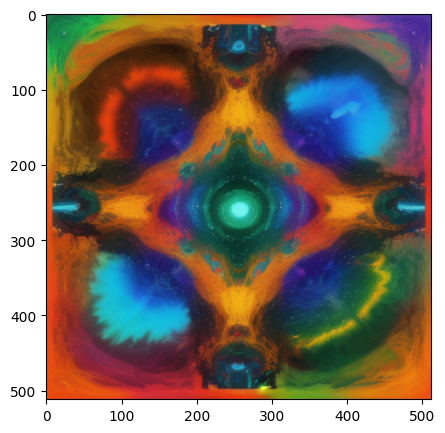

In [66]:
img = cv2.imread('../data/lab2-img.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

(<Axes: >, <matplotlib.image.AxesImage at 0x1f762267ed0>)

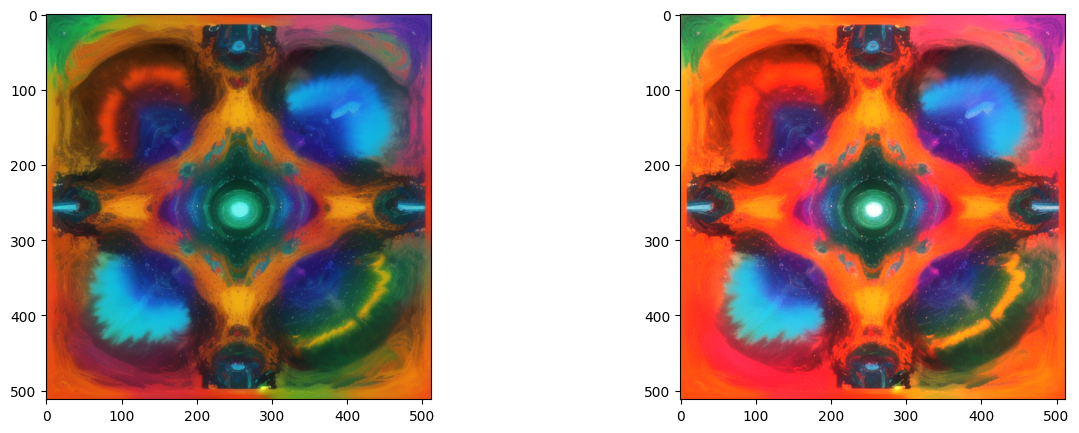

In [67]:
# Define white patch and the coefficients
row, col = 256, 256 
white = img[row, col, :]
coeffs = 255.0 / white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[:, :, channel] = img[:, :, channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

(<Axes: >, <matplotlib.image.AxesImage at 0x1f75e25fed0>)

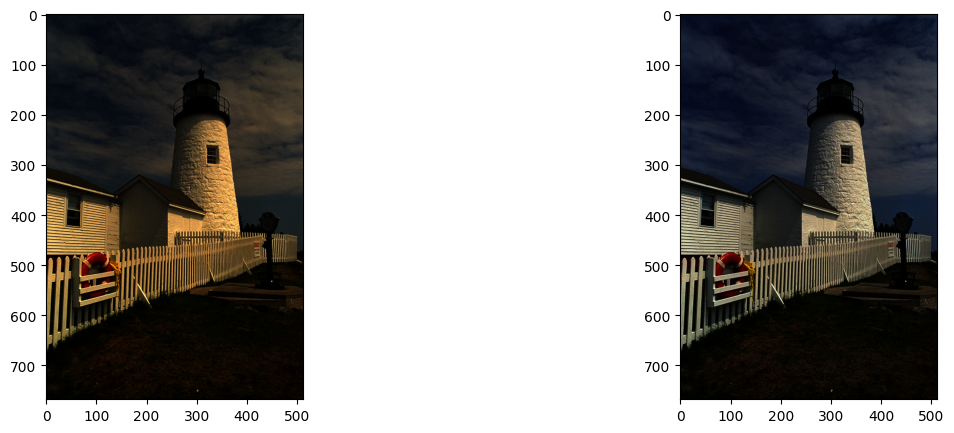

In [68]:
# Load your image
img = cv2.imread('../data/lab2-dark.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
mean_r = img[:, :, 0].mean()
mean_g = img[:, :, 1].mean()
mean_b = img[:, :, 2].mean()

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.
gray = (0.2989 * mean_r + 0.5870 * mean_g + 0.1140 * mean_b)
kr = gray / mean_r
kg = gray / mean_g
kb = gray / mean_b

# Apply color balancing and generate the balanced image
coeffs = [kr, kg, kb]
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[:, :, channel] = img[:, :, channel] * coeffs[channel]

balanced = balanced/255
balanced[balanced > 1] = 1

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

Before: [246, 255, 245]
After: [255, 255, 255]


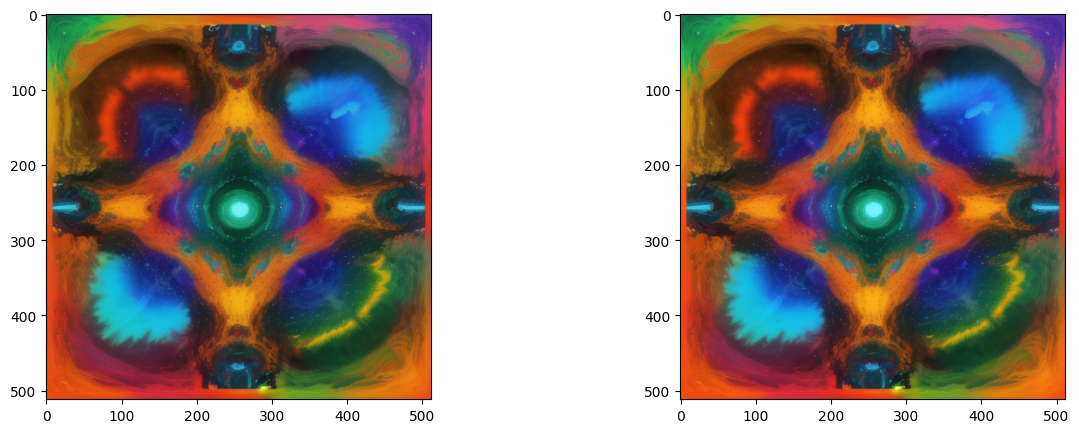

In [69]:
# Load your image
img = cv2.imread('../data/lab2-img.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = img[:, :, 0].max()
max_g = img[:, :, 1].max()
max_b = img[:, :, 2].max()

print("Before:", [max_r, max_g, max_b])

# Apply scale-by-max balancing and generate the balanced image
coeffs = 255 / np.array([max_r, max_g, max_b])
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[:, :, channel] = img[:, :, channel] * coeffs[channel]

balanced = balanced.astype('uint8')

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

print("After:", [balanced[:, :, 0].max(), balanced[:, :, 1].max(), balanced[:, :, 2].max()])